# [Regression] : New York City Airbnb Open Data

<사용 되는 데이터 : AB_NYC_2019.csv>

- price : 가격(미 달러)
- minimum_nights : 최소 숙박 일수
- number_of_reviews : 리뷰의 개수
- last_reviews : 마지막 리뷰 일자
- reviews_per_month : 월별 리뷰 개수
- calculated_host_listing_count : 호스트가 올린 방 개수
- availability_365 : 365일 중 가능한 일수

- [source] : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

------------------

# 1. 모듈 및 데이터 호출

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 2. EDA 및 기초 통계

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 불피요한 칼럼 지우기

In [11]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

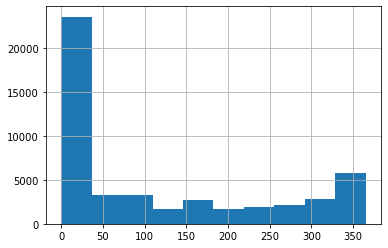

In [13]:
df['availability_365'].hist()

- 대부분 숫자를 직접 넣지 않은 듯

### 수치형 데이터와 Price의 Jointplot 분석하기

In [14]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

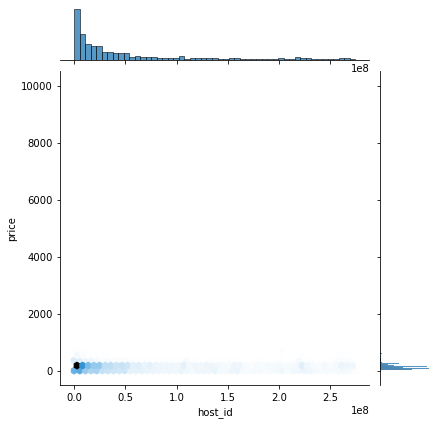

In [16]:
sns.jointplot(x='host_id', y='price',data=df, kind='hex')

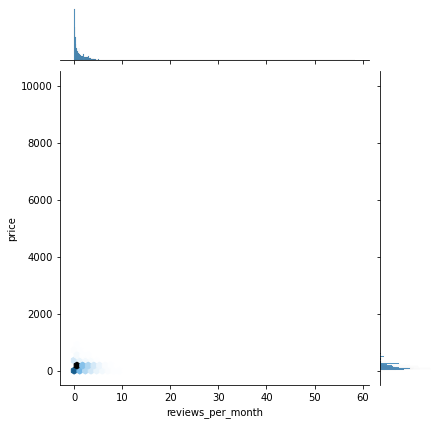

In [17]:
sns.jointplot(x='reviews_per_month', y='price',data=df, kind='hex')

- 10000 인근의 price 아웃라이어 때문에 비이상적으로 그려짐

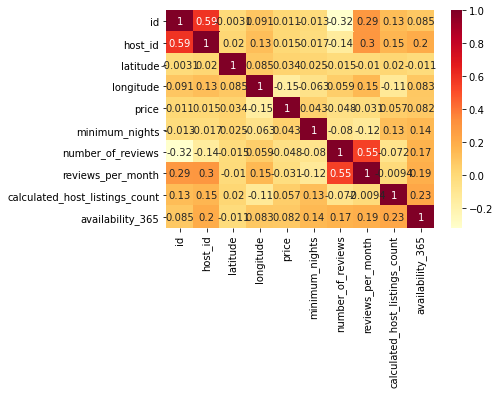

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

### 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

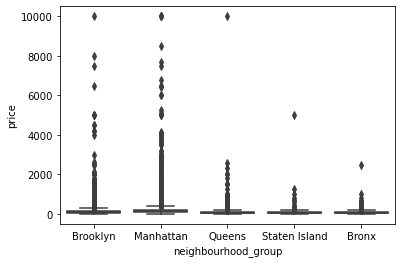

In [19]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

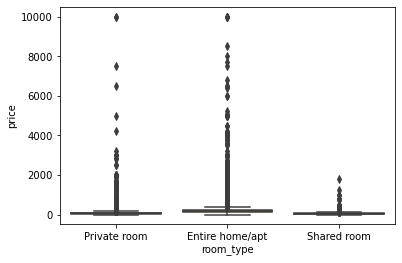

In [20]:
sns.boxplot(x='room_type', y='price', data=df)

- 범주형에도 아웃라이가 많다는 것을 알 수 있음

---------------

# 3. 데이터 클렌징

In [21]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 이상치 확인

In [29]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

- room_type : 이상적

In [22]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

- neighbourhood_group : 이상적

In [24]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Willowbrook              1
Rossville                1
New Dorp                 1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

- neighbourhood : 221개의 범주는 너무 많아서 비이상적 > 줄여줘야함

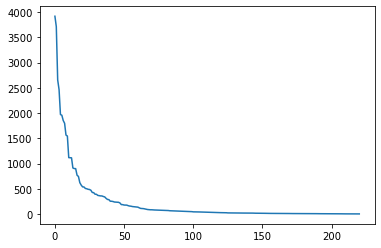

In [25]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

- 50개 이하개수부터 급감 >> 상위 50개만 유지하기로 결정

In [80]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s : s if str(s) not in neigh[50:] else 'others')

In [27]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

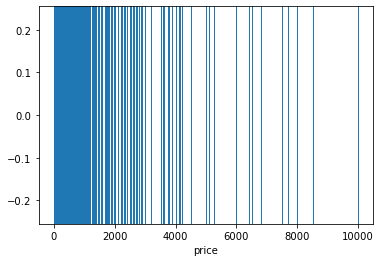

In [31]:
sns.rugplot(x='price', data=df, height=1)

In [33]:
print(df['price'].quantile(0.95)) # 상위 5%에 해당하는 이상치
print(df['price'].quantile(0.005)) # price가 0 값으로 잘못 들어간 케이스가 있었기 때문에 해당 값들 제거 필요

355.0
26.0


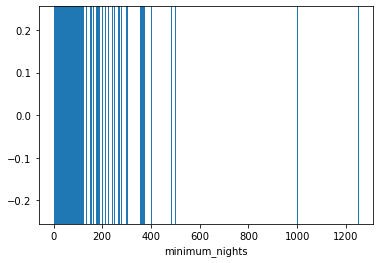

In [36]:
sns.rugplot(x='minimum_nights', data=df, height=1)

In [41]:
print(df['minimum_nights'].quantile(0.98)) 
print(df['minimum_nights'].quantile(0.0000001))  # 하위는 최소 1부터 시작 정상적으로 판단되어 제거 X

30.0
1.0


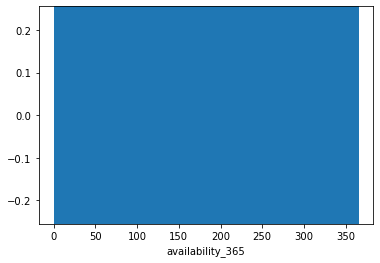

In [42]:
sns.rugplot(x='availability_365', data=df, height=1)

In [52]:
print(df['availability_365'].quantile(0.35)) # 하위 35%가 0임

0.0


### 아웃라이어 제거 및 통계 재분석

In [81]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)

print(p1, p2)

355.0 26.0


In [82]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

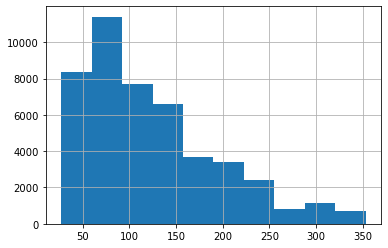

In [83]:
df['price'].hist()

In [84]:
m1 = df['minimum_nights'].quantile(0.98)

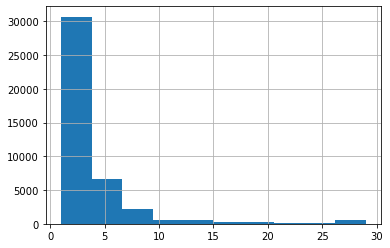

In [85]:
df = df[(df['minimum_nights'] < m1)]
df['minimum_nights'].hist()

In [89]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x : 'Zero' if x==0 else 'Nonzero')

### 미기입 데이터 처리하기

In [91]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x : 'No' if x is True else 'Yes')

In [94]:
df.fillna(0, inplace=True)

In [95]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

----------------------------------

# 4. 모델 학습을 위한 데이터 전처리

In [96]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [97]:
X_cat = df[['neighbourhood_group','neighbourhood','room_type', 'is_avail_zero', 'review_exists']]
X_cat = pd.get_dummies(X_cat) # linear 모델 안쓰니 drop_first 옵션 사용 안한다 (?!)

### StandardScaler를 이용해 수치형 데이터 표준화

In [100]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,is_avail_zero,review_exists
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,others,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Nonzero,Yes
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Nonzero,Yes
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,Nonzero,No
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Nonzero,Yes
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Zero,Yes


In [99]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

X_num = df[['id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month','calculated_host_listings_count', 'availability_365']]

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

### 학습데이터와 테스트데이터 분리하기

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

-----------------

# 모델링

### XGBoost Regression

In [106]:
from xgboost import XGBRegressor

In [108]:
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 모델 평가하기

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [111]:
pred = model_reg.predict(X_test)

print('MAE :', mean_absolute_error(y_test, pred))
print('RMSE :', sqrt(mean_squared_error(y_test, pred)))

MAE : 33.703543259716234
RMSE : 47.67447868666333


## 모델 학습 결과 심화 분석하기

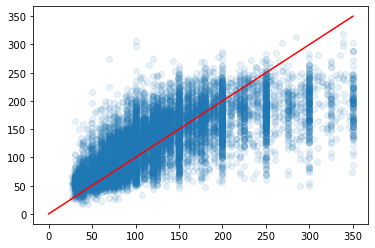

In [114]:
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0,350], 'r-')

#### 에러율 확인

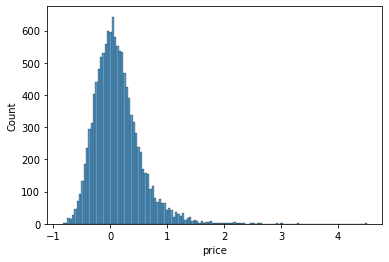

In [115]:
err = (pred - y_test) / y_test
sns.histplot(err)

#### 에러값 확인

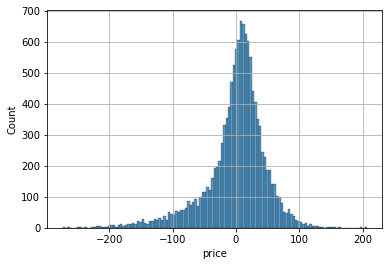

In [117]:
err = pred - y_test
sns.histplot(err)
plt.grid()

- 대체적으로 저평가 되고 있음을 알 수 있음